::: {.content-visible unless-format="revealjs"}

<center>
<a class="h2" href="./slides.html" target="_blank">Open slides in new window &rarr;</a>
</center>

:::

# Week 4 Recap + Wrapup {data-stack-name="Week 4 Wrapup"}

## Hash Tables: tldr Edition {.crunch-title .crunch-ul}

* **Keys** $k \in \mathcal{K}$ are plugged into a (deterministic) **hash function** $h: \mathcal{K} \rightarrow \{1, \ldots, N\}$, producing an **index** where $k$ is stored
* If **nothing at that index yet**, store $(k,v)$ in empty slot
* If **already an item at that index**, we have a ⚠️**collision**⚠️
* We could just **throw away** the old value (HW2 Part 1)
* Otherwise, need a way to store multiple items in one slot... (a way to **dynamically grow** storage at given index)
* Solution you know so far: **Linked Lists**
* New solution: **Binary Search Trees!**

# Binary Search Trees {data-stack-name="BSTs"}

* If you've been annoyed by how long we've talked about Linked Lists for... this is where it finally pays off!

## Linked Lists + Divide-and-Conquer = BSTs {.crunch-title .title-11}

* By now, the word "Linked List" should make you groan, cross your arms and start tapping your feet with impatience
* "Here we go again... the Linked List is gonna make us **traverse through every single element** before we reach the one we're looking for" 😖
* Linked List = Canon in D
* Binary Search Tree = Canon in D played by Hiromi Uehara...

## Hiromi Uehara






```{=html}
<iframe width="100%" height="70%" src="https://www.youtube.com/embed/lpc1lEJ-SRc?si=csxh7-N4-CFUshO1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```






## The Metaphor Goes Deep!

* Uehara's Canon in D = Pachelbel's + Fancier notes/rhythms on top of it
* Binary Search Trees = Linked Lists + Fancier structure built on top of it
  * Specifically: "next" pointer can now **branch** left or right, to ensure **ordering** of nodes

::: {layout="[1,1]"}
::: {#metaphor-left}

```python
class LinkedListNode:
    @property content
    @property next
```

:::
::: {#metaphor-right}

```python
class BinarySearchTreeNode:
    @property content
    @property left
    @property right
```

:::
:::

## Visualizing the Structures {.smaller .crunch-title .crunch-col-output .crunch-details}


In [1]:
#| label: graphviz-setup
#| echo: false
import sys
sys.path.append('/Users/jpj/Library/CloudStorage/Dropbox/gtown/dsan5500-local/HW2/')
from IPython.display import display, HTML
import graphviz as gv # for visualizing a tree using Digraph
from graphviz import Digraph, nohtml
from hw2 import EmptyNode

def visualize_ll(ll):
  dot = Digraph(
      graph_attr={'rankdir': 'LR'},
        node_attr={'shape': 'record', 'height': '.1'}
    )
  prev_node_name = None
  node_pointer = ll.root
  while type(node_pointer) != EmptyNode:
    # New node
    cur_content = node_pointer.content
    cur_name = cur_content.item_name
    dot.node(name=cur_name, label=nohtml('{<f0> '+str(cur_name)+'|<f1>}'))
    # And edge from prev to cur, if not None
    if prev_node_name is not None:
      edge_from = f'{prev_node_name}:f1'
      dot.edge(edge_from, cur_name)
    # Now we can update prev_node_name
    prev_node_name = cur_name
    node_pointer = node_pointer.next
  display(dot)

def visualize(tree):
    dot = Digraph(
        node_attr={'shape': 'record', 'height': '.1'}
    )
    #dot.engine = 'sfdp'
    node_info_list = []
    if tree.root is not None:
      node_info_list.append({'node':tree.root, 'parent_name': None, 'dir': None})
    while len(node_info_list) > 0:
      cur_node_info = node_info_list.pop()
      cur_node = cur_node_info['node']
      cur_name = cur_node.content.item_name
      cur_parent_name = cur_node_info['parent_name']
      cur_dir = cur_node_info['dir']
      dot.node(name=cur_name, label=nohtml(f'<f0>|<f1> {cur_name}|<f2>'))
      if cur_parent_name is not None:
        # Nudge x coord based on parent
        which_port = 'f0'
        if cur_dir == 'R':
          which_port = 'f2'
        edge_from = f'{cur_parent_name}:{which_port}'
        edge_to = f'{cur_name}:f1'
        dot.edge(edge_from, edge_to, label=cur_dir)
      if cur_node.right is not None:
        node_info_list.append({'node': cur_node.right, 'parent_name': cur_name, 'dir': 'R'})
      if cur_node.left is not None:
        node_info_list.append({'node': cur_node.left, 'parent_name': cur_name, 'dir': 'L'})
    display(dot)

::: {.vcenter}


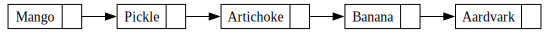

<IPython.core.display.HTML object>

In [2]:
#| fig-align: center
from hw2 import LinkedList, InventoryItem
ll = LinkedList()
item1 = InventoryItem('Mango', 50)
ll.append(item1)
item2 = InventoryItem('Pickle', 60)
ll.append(item2)
item3 = InventoryItem('Artichoke', 55)
ll.append(item3)
item5 = InventoryItem('Banana', 123)
ll.append(item5)
item6 = InventoryItem('Aardvark', 11)
ll.append(item6)
HTML(visualize_ll(ll))

:::


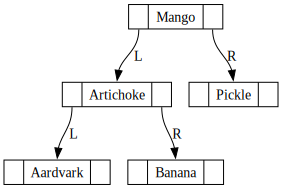

<IPython.core.display.HTML object>

In [3]:
#| fig-align: center
from hw2 import BinarySearchTree
bst = BinarySearchTree()
item1 = InventoryItem('Mango', 50)
bst.add(item1)
item2 = InventoryItem('Pickle', 60)
bst.add(item2)
item3 = InventoryItem('Artichoke', 55)
bst.add(item3)
item5 = InventoryItem('Banana', 123)
bst.add(item5)
item6 = InventoryItem('Aardvark', 11)
bst.add(item6)
HTML(visualize(bst))

## Practical Considerations

* **Hash Maps**: Only useful if keys are **hashable**
  * Python has a built-in `collections.abc.Hashable` class, such that `hash(my_obj)` works iff `isinstance(my_obj, Hashable)`
* **Binary Search Trees**: Only useful if keys have an **ordering**
  * "Standard" classes (`int`, `str`, `datetime`) come with implementations of ordering, but if you make **your own class** you need to **implement the ordering** for it!
* (**Linked Lists** still work for non-hashable/orderable objects!)

## Why `==`, `<`, `>=` "Just Work" {.crunch-title .smaller .crunch-ul}

* Not magic! Someone has **explicitly written a set of functions** telling Python **what to do** when it sees e.g. `obj1 < obj2`
* Example: let's implement an ordering of vectors $\mathbf{x} \in \mathbb{R}^2$ based on **Pareto dominance**

![](images/pareto.svg){fig-align="center"}

## Ordering Vectors via Pareto Dominance {.smaller .crunch-title .title-12}


True
False


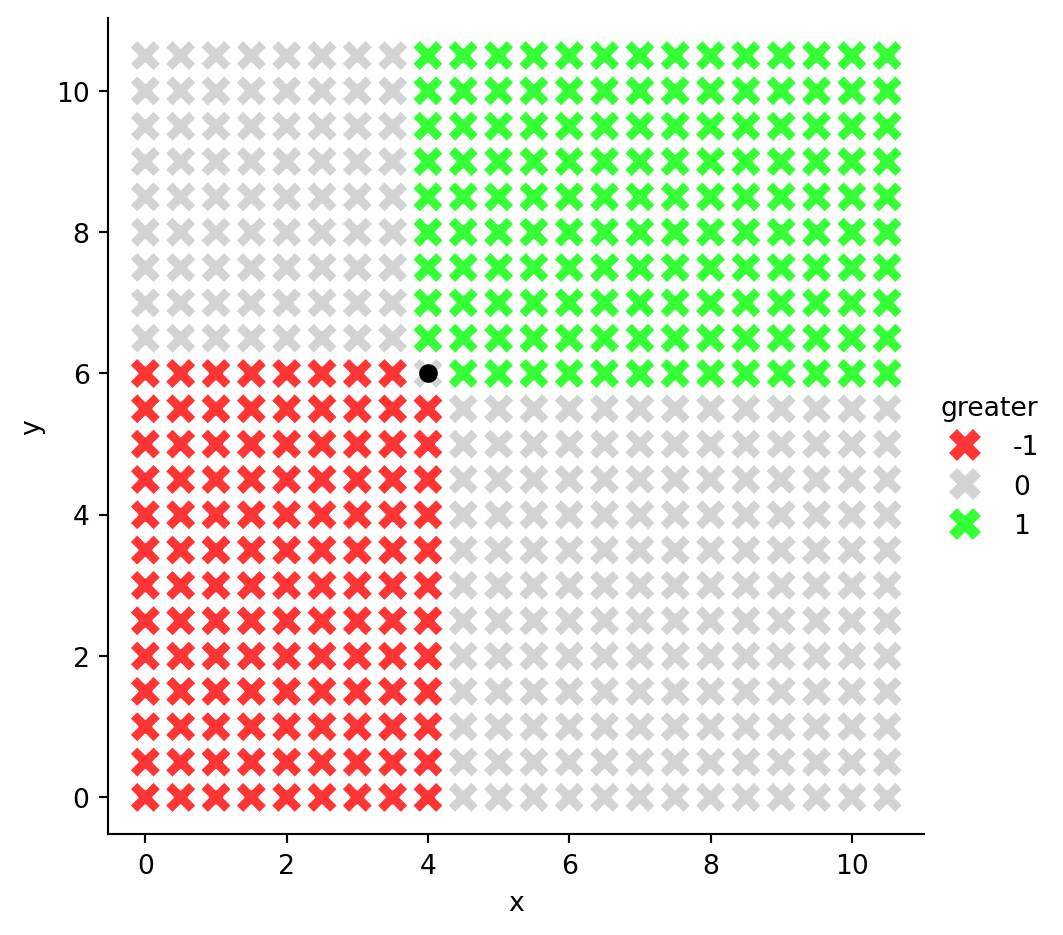

In [4]:
class UtilVector:
    def __init__(self, u1, u2):
        self.u1 = u1
        self.u2 = u2
    
    def __eq__(self, other):
        if not isinstance(other, UtilVector):
            return NotImplemented
        return self.u1 == other.u1 and self.u2 == other.u2

    def __ne__(self, other):
        if not isinstance(other, UtilVector):
            return NotImplemented
        return self.u1 != other.u1 or self.u2 != other.u2
    
    def __gt__(self, other):
        if not isinstance(other, UtilVector):
            return NotImplemented
        return self.u1 > other.u1 and self.u2 >= other.u2 or self.u1 >= other.u1 and self.u2 > other.u2

    def __ge__(self, other):
        return self.__gt__(other) or self.__eq__(other)
        
    def __lt__(self, other):
        if not isinstance(other, UtilVector):
            return NotImplemented
        return other.__gt__(self)

    def __le__(self, other):
        return self.__lt__(other) or self.__eq__(other)
xA = UtilVector(2, 2)
xB = UtilVector(3, 2)
print(xB > xA)
xC = UtilVector(2, 3)
print(xC > xB)
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x0 = UtilVector(4, 6)
util_vals = np.arange(0, 11, 0.5)
util_pairs = list(itertools.product(util_vals, util_vals))
util_df = pd.DataFrame(util_pairs, columns=['x','y'])
def compare_to_x0(row):
    row_vec = UtilVector(row['x'], row['y'])
    gt_result = int(row_vec > x0)
    lt_result = int(row_vec < x0)
    return gt_result - lt_result
util_df['greater'] = util_df.apply(compare_to_x0, axis=1)
#my_palette = sns.color_palette(['#E69F00','lightgray','#CCFFCC'])
my_palette = sns.color_palette(['#FF3535','lightgray','#35FF35'])
sns.relplot(
    data=util_df,
    x='x', y='y',
    hue='greater',
    palette=my_palette,
    marker='X', s=150
);
x0_df = pd.DataFrame({'x': [4], 'y': [6]})
plt.scatter(data=x0_df, x='x', y='y', color='black')
plt.gca().set_aspect('equal')

## Back to BSTs

* For HW2, we provide you with an `InventoryItem` class
* Two instance variables: `item_name` and `price`
* Equivalence relations:
  * `__eq__(other)`, `__ne__(other)`
* **Ordering relations**:
  * `__lt__(other)`, `__le__(other)`, `__gt__(other)`, `__ge__(other)`
* Bonus: `__repr__()` and `__str__()`

## LLs $\rightarrow$ BSTs: The Hard Part

* When we were working with LinkedLists, we could access all items by just "looping through", from one element to the next, printing as we go along.
* But... for a BinarySearchTree, since our structure can now **branch** as we traverse it... How do we "loop through" a BST?
* **Two fundamentally different ways** to traverse every node in our BST
* "Opposites" of each other, so that one is often extremely efficient and the other extremely inefficient for a given task
* Your job as a data scientist is to **think carefully** about which one is **more efficient** for a given goal!

## Two Ways to Traverse: IRL Version {.smaller .crunch-title .title-12 .crunch-ul .crunch-callout}

* Imagine we're trying to learn about a topic $\tau$ using **Wikipedia**, so we find its article $\tau_0$
* There are two "extremes" in terms of strategies we could follow for learning, given the **contents** of the article as well as the **links** it contains to **other articles** 

::: {.callout-note icon="false" title="<i class='bi bi-info-circle pe-1'></i> Depth-First Search (DFS)" style="margin-bottom: 8px !important;"}

* Open $\tau_0$ and start reading it; When we encounter a **link** we **always click it** and **immediately start reading** the new article.
* If we hit an article with no links (or a dead end/broken link), we finish reading it and click the **back button**, picking up where we left off in the previous article. When we reach the end of $\tau_0$, we're done!

:::

::: {.callout-note icon="false" title="<i class='bi bi-info-circle pe-1'></i> Breadth-First Search (BFS)"}

* Bookmark $\tau_0$ in a folder called **"Level 0 Articles"**; open and start reading it
* When we encounter a **link**, we **put it in a "Level 1 Articles" folder**, but **continue reading $\tau_0$** until we reach the end.
* We then **open all "Level 1 Articles"** in new tabs, placing links we encounter in **these** articles into a **"Level 2 Articles"** folder, that we only start reading once all "Level 1 Articles" are read
* We continue like this, reading "Level 3 Articles" once we're done with "Level 2 Articles", "Level 4 Articles" once we're done with "Level 3 Articles", and so on. (Can you see a sense in which this is the **"opposite"** of DFS?)

:::

* ...Let's try them out! I clicked "Random Article" and got <a href='https://en.wikipedia.org/wiki/Eustache_de_Saint_Pierre' target='_blank'>Eustache de Saint Pierre <i class='bi bi-box-arrow-up-right ps-1'></i></a>

## Two Ways to Traverse: Picture Version {.smaller .crunch-title .crunch-details}

::: {.columns}
::: {.column width="50%"}


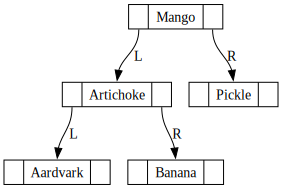

In [5]:
#| fig-align: center
from hw2 import IterAlgorithm, NodeProcessor
visualize(bst)

:::
::: {.column width="50%"}


In [6]:
print("DFS:")
dfs_processor = NodeProcessor(IterAlgorithm.DEPTH_FIRST)
#print(type(dfs_processor.node_container))
dfs_processor.iterate_over(bst)

print("\nBFS:")
bfs_processor = NodeProcessor(IterAlgorithm.BREADTH_FIRST)
#print(type(bfs_processor.node_container))
bfs_processor.iterate_over(bst)

DFS:
InventoryItem[item_name=Mango,price=50]
InventoryItem[item_name=Pickle,price=60]
InventoryItem[item_name=Artichoke,price=55]
InventoryItem[item_name=Banana,price=123]
InventoryItem[item_name=Aardvark,price=11]

BFS:
InventoryItem[item_name=Mango,price=50]
InventoryItem[item_name=Artichoke,price=55]
InventoryItem[item_name=Pickle,price=60]
InventoryItem[item_name=Aardvark,price=11]
InventoryItem[item_name=Banana,price=123]


:::
:::

## Two Ways to Traverse: In-Words Version {.smaller .crunch-title .title-12}

1. **Depth-First Search (DFS)**: With this approach, we iterate through the BST by **always taking the left child as the "next" child** until we hit a **leaf node** (which means, we cannot follow this left-child pointer any longer, since a leaf node does not have a left child or a right child!), and only at that point do we **back up** and take the **right children** we skipped.
2. **Breadth-First Search (BFS)**: This is the **"opposite"** of DFS in the sense that we traverse the tree level-by-level, **never moving to the next level of the tree** until we're **sure that we have visited every node on the current level**.

## Two Ways to Traverse: Animated Version {.smaller .crunch-title .title-12}

::: {layout="[1,1]"}

![**Depth-First Search** (from <a href='https://upload.wikimedia.org/wikipedia/commons/7/7f/Depth-First-Search.gif' target='_blank'>Wikimedia Commons</a>)](images/Depth-First-Search.gif){fig-align="center"}

![**Breadth-First Search** (from <a href='https://commons.wikimedia.org/wiki/File:Breadth-First-Search-Algorithm.gif' target='_blank'>Wikimedia Commons</a>)](images/Breadth-First-Search.gif){fig-align="center"}

:::

## Two Ways to Traverse: Underlying Data Structures Version {.smaller .crunch-title}

* Now that you have some intuition, you may be thinking that they might require very different code to implement 🤔
* This is where the **mathematical-formal linkage** between the two becomes ultra helpful!
* It turns out (and a full-on algorithmic theory course makes you prove) that

1. **Depth-First Search** can be accomplished by **processing nodes in an order determined by adding each to a *stack***, while
2. **Breadth-First Search** can be accomplished by **processing nodes in an order determined by adding each to a *queue***!

* $\implies$ Literally **identical code**, "pulling out" the word **stack** and replacing it with the word **queue** within your code (or vice-versa).
* If you have your Software Engineer Hats on, you'll recognize this as a job for an **abstraction layer!**

## Two Ways to Traverse: HW2 Version

* You'll make a class called `NodeProcessor`, with a **single** `iterate_over(tree)` function
* This function---**without any changes in the code or even any if statements!**---will be capable of both DFS and BFS
* It will take in a `ThingContainer` (could be a **stack** or a **queue**, you won't know which), which has two functions:
  * `put_new_thing_in(new_thing)`
  * `take_existing_thing_out()`

## Three Animals in the DFS Species

| DFS Procedure | Algorithm |
| - | - |
| Pre-Order Traversal | 1. **Print node**<br>2. Traverse left subtree<br>3. Traverse right subtree |
| **In-Order** Traversal 🧐‼️ | 1. Traverse left subtree<br>2. **Print node**<br>3. Traverse right subtree |
| Post-Order Traversal | 1. Traverse left subtree<br>2. Traverse right subtree<br>3. **Print node** |

## The Three Animals Traverse our Inventory Tree {.smaller .crunch-title .title-10}


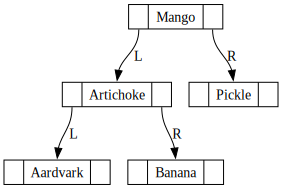

In [7]:
#| fig-align: center
visualize(bst)

## Final Notes for HW2

* The last part challenges you to ask: **why stop at a hash based on just the *first* letter of the key?**
* We could just as easily use the first **two** letters:
* `h('AA') = 0`, `h('AB') = 1`, ..., `h('AZ') = 25`,
* `h('BA') = 26`, `h('BB') = 27`, ..., `h('BZ') = 51`,
* `h('CA') = 52`, ..., `h('ZZ') = 675`.
* You will see how this gets us **even closer to the elusive $O(1)$!** And we could get even closer with three letters, four letters, ... 🤔🤔🤔